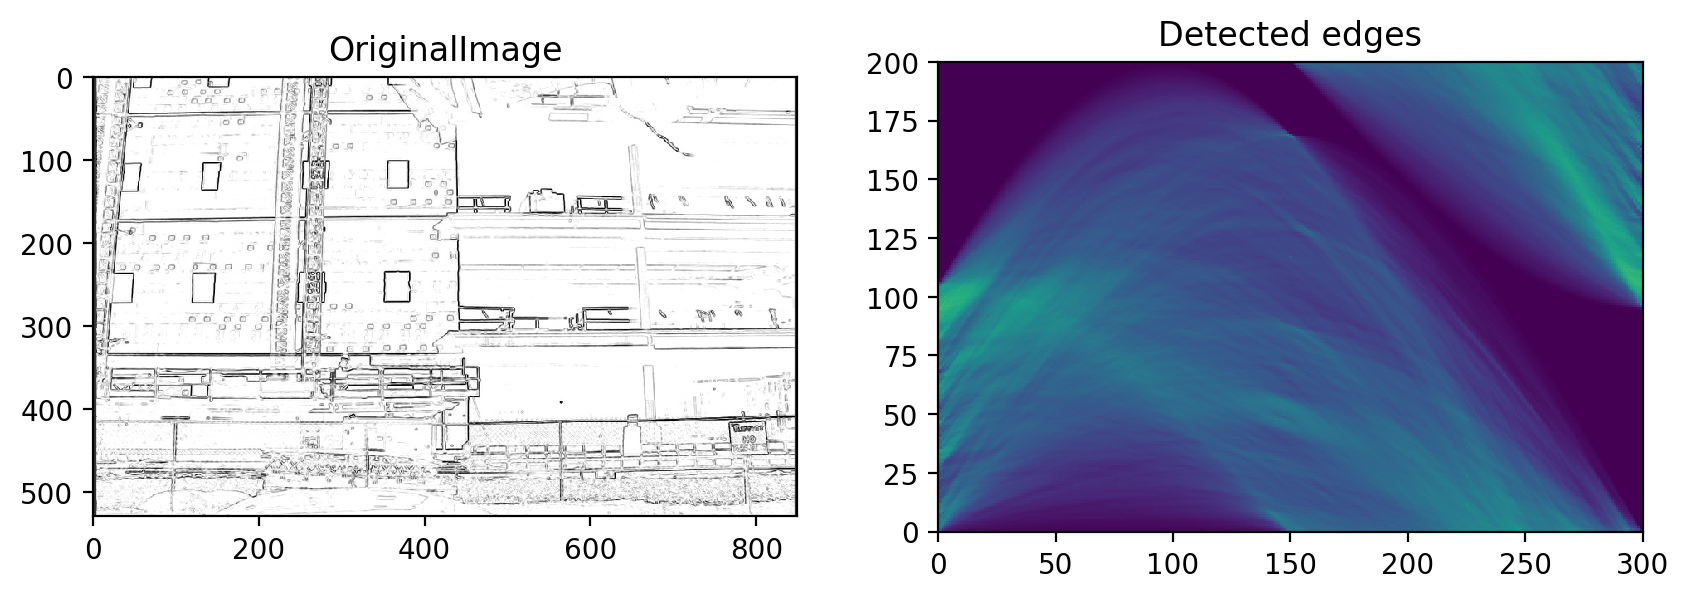

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

image = cv2.imread('../Images/Cropped_Runway_Images/town.png')


# def SobelOperator(image):
#     gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.GaussianBlur(gray,(3,3),0)
#     sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 5)
#     sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 5)
#     result = abs(sobel_x) + abs(sobel_y)
#     image = cv2.bitwise_not(result)
#     return image

# image = SobelOperator(image) 

def createHoughSpace(image):
    image = cv2.bitwise_not(image)
    image_width, image_height = image.shape[0], image.shape[1]
    theta_max , theta_min = 1.0 * math.pi, 0.0
    r_min, r_max = 0.0, math.hypot(image_width,image_height) #sqrt(pow(x_max,2) + pow(y_max,2))
    r_dim = 200
    theta_dim = 300
    hough_space = np.zeros((r_dim,theta_dim))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    for x in range(image_width):
        for y in range(image_height):
            if image[x,y] == 255: continue
            for i_theta in range(theta_dim):
                theta = 1.0 * i_theta * theta_max / theta_dim  # pixel direction in a polar form 
                r = x * math.cos(theta) + y * math.sin(theta)  # distance - instead of x and y
                ir = r_dim * (1.0 * r) / r_max
                hough_space[int(ir),int(i_theta)] = hough_space[int(ir), int(i_theta)] + 1        
    #1
    plt.figure(figsize=(10,7),dpi=200)
    plt.subplot(2,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('OriginalImage')
    #2
    plt.subplot(2,2,2)
    plt.imshow(hough_space, origin = 'lower')
    plt.xlim(0,theta_dim) 
    plt.ylim(0,r_dim)
    plt.title('Detected edges')
    return image,hough_space,r_max,r_dim,theta_max,theta_dim,image_width, image_height

image,hough_space,r_max,r_dim,theta_max,theta_dim,image_width, image_height = createHoughSpace(image)

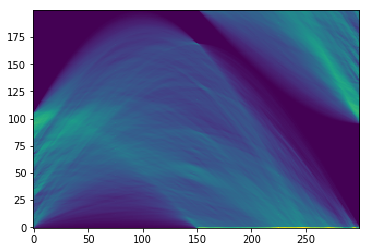

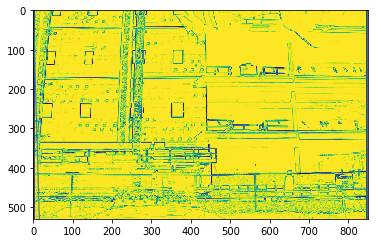

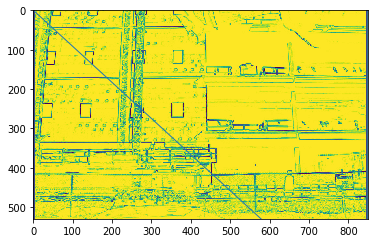

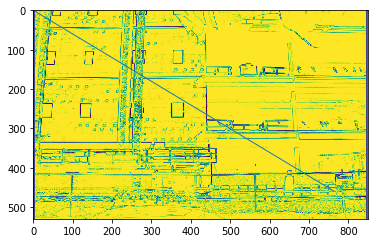

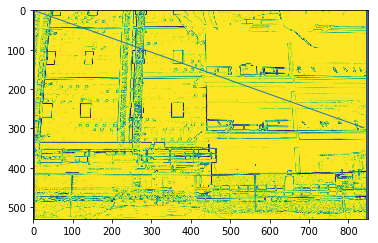

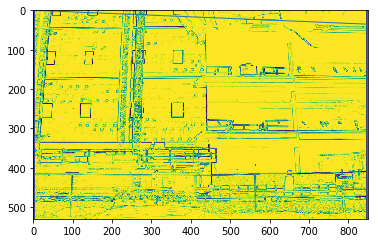

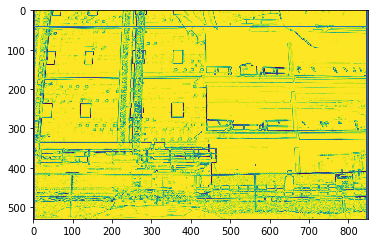

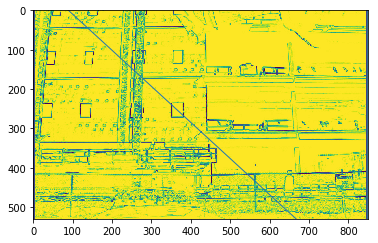

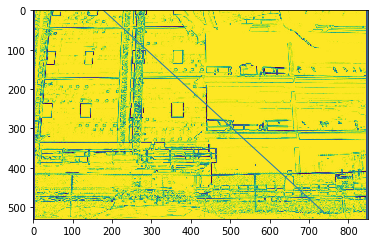

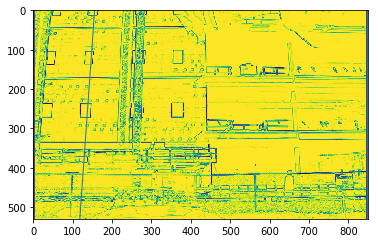

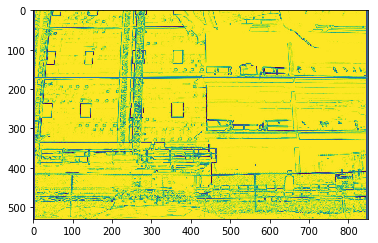

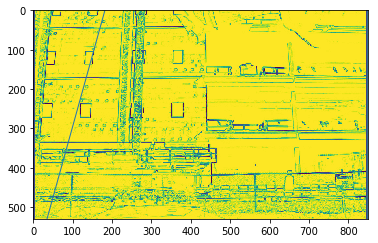

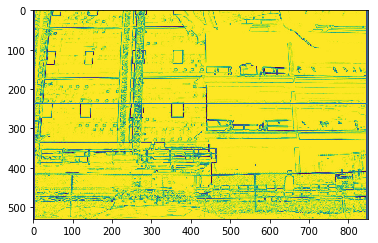

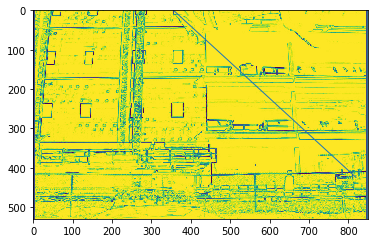

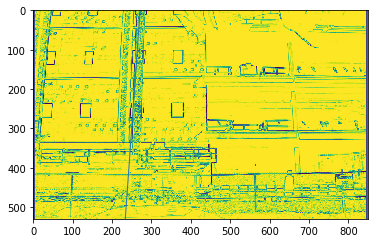

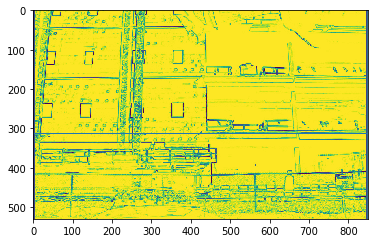

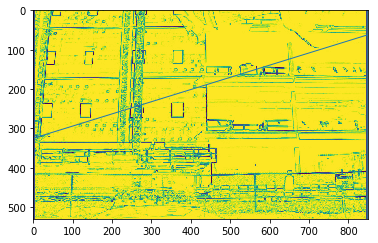

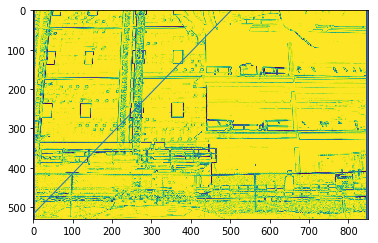

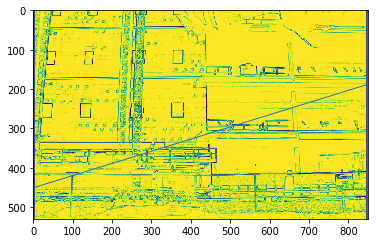

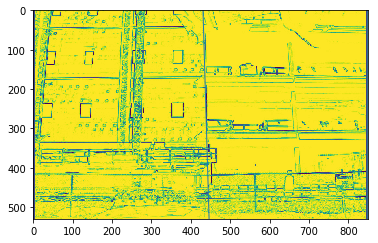

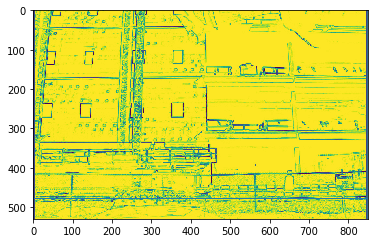

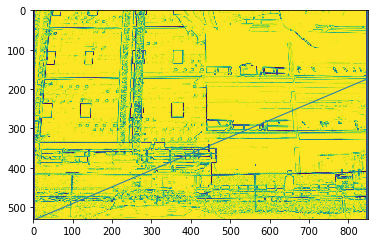

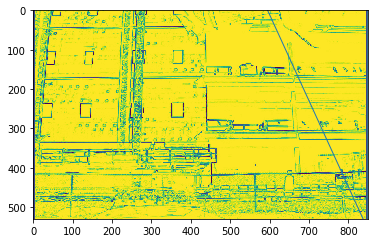

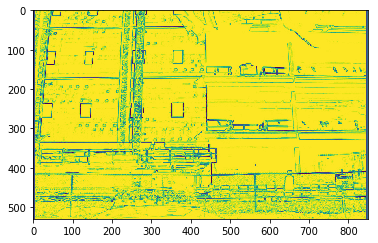

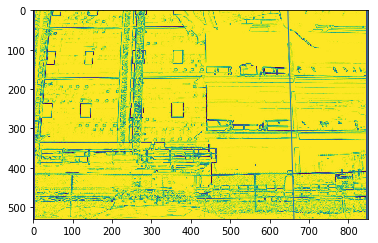

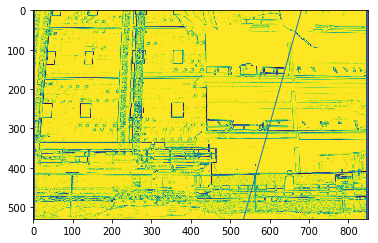

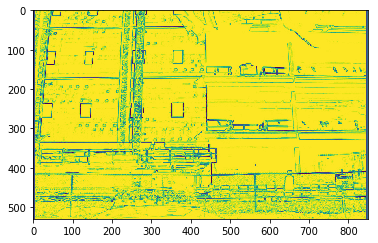

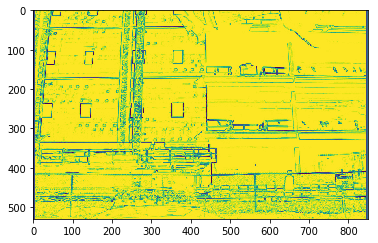

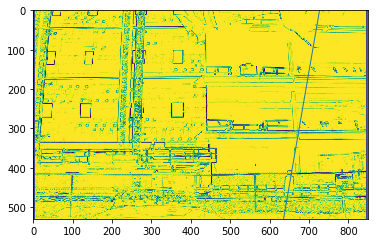

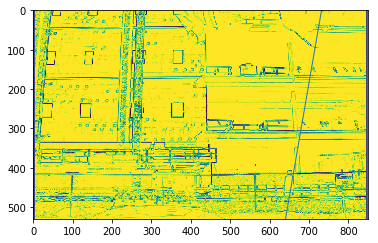

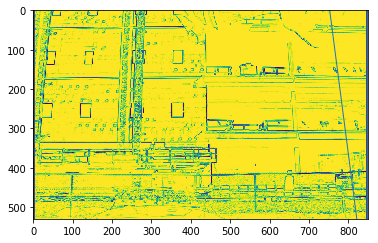

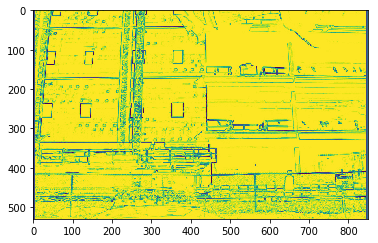

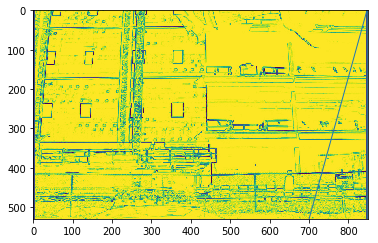

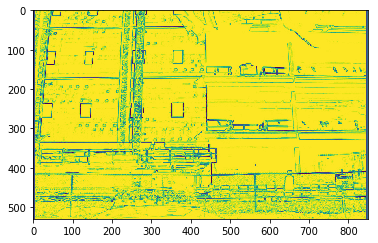

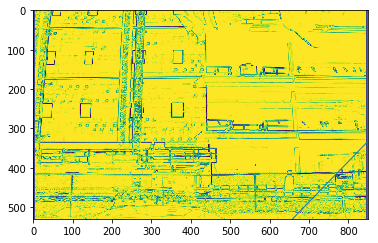

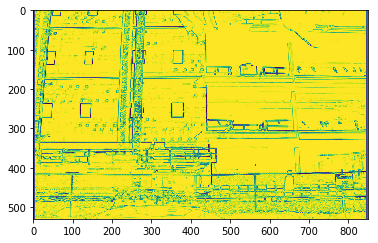

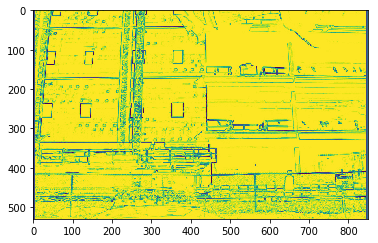

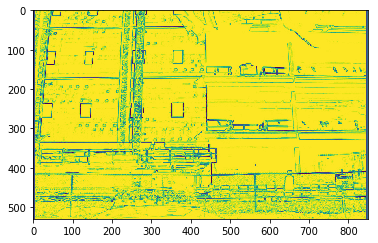

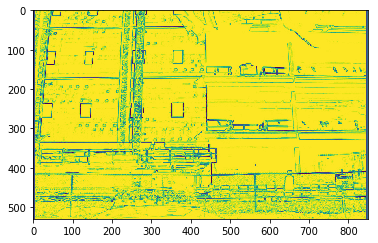

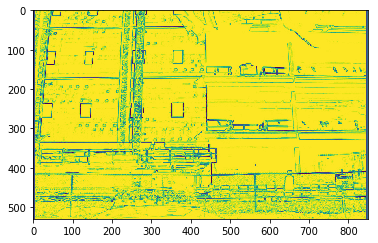

In [7]:
def MaximusIteration(image,hough_space,r_max,r_dim,theta_max,theta_dim,image_width, image_height):
    neighborhood_size = 20
    threshold = 140
    data_max = filters.maximum_filter(hough_space, neighborhood_size)
    maxima = (hough_space == data_max)
    data_min = filters.minimum_filter(hough_space, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0
    labeled, num_objects = ndimage.label(maxima)
    slices = ndimage.find_objects(labeled)
    x, y = [], []
    for dy,dx in slices:
        x_center = (dx.start + dx.stop - 1)/2
        x.append(x_center)
        y_center = (dy.start + dy.stop - 1)/2    
        y.append(y_center)
    plt.imshow(hough_space, origin='lower')
    line_index = 1
    for i,j in zip(y, x):
        r = round( (1.0 * i * r_max ) / r_dim,1)
        theta = round( (1.0 * j * theta_max) / theta_dim,1)
        fig, ax = plt.subplots()
        ax.imshow(image)
        ax.autoscale(False)
        px = list()
        py = list()
        for i in range(-image_height-40,image_height+40,1):
            px.append( math.cos(-theta) * i - math.sin(-theta) * r ) 
            py.append( math.sin(-theta) * i + math.cos(-theta) * r )
        ax.plot(px,py, linewidth=1)
        plt.show()
        plt.close()
        line_index = line_index + 1
        
MaximusIteration(image,hough_space,r_max,r_dim,theta_max,theta_dim,image_width, image_height)

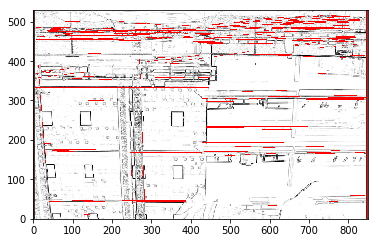

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('../Images/Cropped_Runway_Images/town.png')
image = cv2.bitwise_not(image)

def OpenCVVersion(image):   
    edges = cv2.Canny(image, 50, 200)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=30, maxLineGap=10)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)
    plt.imshow(image, origin = 'lower')
    plt.show()
OpenCVVersion(image)